In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | antofagasta
Processing Record 2 of Set 1 | hambantota
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | mrirt
City not found. Skipping...
Processing Record 8 of Set 1 | yumen
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | gympie
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | yeniseysk
Processing Record 15 of Set 1 | greeley
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | estevan
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | plessisville
Processing Record 21 of Set 1 | storste

City not found. Skipping...
Processing Record 37 of Set 4 | port alfred
Processing Record 38 of Set 4 | andenes
Processing Record 39 of Set 4 | gazanjyk
Processing Record 40 of Set 4 | camargo
Processing Record 41 of Set 4 | arraial do cabo
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | iralaya
Processing Record 44 of Set 4 | bolshegrivskoye
City not found. Skipping...
Processing Record 45 of Set 4 | paamiut
Processing Record 46 of Set 4 | tallahassee
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | mount gambier
Processing Record 49 of Set 4 | pamyat parizhskoy kommuny
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | zhumadian
Processing Record 2 of Set 5 | yulara
Processing Record 3 of Set 5 | staraya russa
Processing Record 4 of Set 5 | cidreira
Processing Record 5 of Set 5 | oka
Processing Record 6 of Set 5 | aksu
Processing Record 7 of Set 5 | scottsbluff
Processing Record 8 of Set 5 | chokurdakh
Processi

Processing Record 24 of Set 8 | magadan
Processing Record 25 of Set 8 | annau
Processing Record 26 of Set 8 | tinde
Processing Record 27 of Set 8 | marsh harbour
Processing Record 28 of Set 8 | necochea
Processing Record 29 of Set 8 | pasni
Processing Record 30 of Set 8 | bandrele
Processing Record 31 of Set 8 | nabire
Processing Record 32 of Set 8 | alofi
Processing Record 33 of Set 8 | carahue
Processing Record 34 of Set 8 | milford
Processing Record 35 of Set 8 | daura
Processing Record 36 of Set 8 | sakakah
Processing Record 37 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 38 of Set 8 | thinadhoo
Processing Record 39 of Set 8 | kunming
Processing Record 40 of Set 8 | tsienyane
City not found. Skipping...
Processing Record 41 of Set 8 | prince rupert
Processing Record 42 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 43 of Set 8 | alamosa
Processing Record 44 of Set 8 | karasjok
Processing Record 45 of Set 8 | talnakh
Processing 

Processing Record 16 of Set 12 | alihe
Processing Record 17 of Set 12 | bardiyah
Processing Record 18 of Set 12 | knysna
Processing Record 19 of Set 12 | guanica
Processing Record 20 of Set 12 | port shepstone
Processing Record 21 of Set 12 | mirnyy
Processing Record 22 of Set 12 | sokyryany
Processing Record 23 of Set 12 | cochrane
Processing Record 24 of Set 12 | paso de carrasco
Processing Record 25 of Set 12 | marrakesh
Processing Record 26 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 27 of Set 12 | fomboni
Processing Record 28 of Set 12 | post falls
Processing Record 29 of Set 12 | shache
Processing Record 30 of Set 12 | katima mulilo
Processing Record 31 of Set 12 | waingapu
Processing Record 32 of Set 12 | ileza
Processing Record 33 of Set 12 | kitimat
Processing Record 34 of Set 12 | san policarpo
Processing Record 35 of Set 12 | port augusta
Processing Record 36 of Set 12 | manta
Processing Record 37 of Set 12 | sasovo
Processing Record 38 of S

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Antofagasta,-23.6500,-70.4000,61.88,78,100,4.41,CL,2021-11-25 00:36:40
1,Hambantota,6.1241,81.1185,75.54,100,40,3.44,LK,2021-11-25 00:36:40
2,Albany,42.6001,-73.9662,34.52,71,98,2.75,US,2021-11-25 00:33:46
3,Mataura,-46.1927,168.8643,72.82,26,100,8.08,NZ,2021-11-25 00:36:41
4,Iqaluit,63.7506,-68.5145,28.13,74,75,31.07,CA,2021-11-25 00:36:42
5,Yumen,40.2833,97.2000,27.19,32,0,10.98,CN,2021-11-25 00:36:42
6,Ribeira Grande,38.5167,-28.7000,64.98,69,100,24.11,PT,2021-11-25 00:36:42
7,Gympie,-26.1898,152.6650,78.31,76,100,3.94,AU,2021-11-25 00:36:43
8,Hermanus,-34.4187,19.2345,57.79,72,0,20.45,ZA,2021-11-25 00:36:43
9,Cabo San Lucas,22.8909,-109.9124,78.10,64,1,14.97,MX,2021-11-25 00:33:54


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Antofagasta,CL,2021-11-25 00:36:40,-23.6500,-70.4000,61.88,78,100,4.41
1,Hambantota,LK,2021-11-25 00:36:40,6.1241,81.1185,75.54,100,40,3.44
2,Albany,US,2021-11-25 00:33:46,42.6001,-73.9662,34.52,71,98,2.75
3,Mataura,NZ,2021-11-25 00:36:41,-46.1927,168.8643,72.82,26,100,8.08
4,Iqaluit,CA,2021-11-25 00:36:42,63.7506,-68.5145,28.13,74,75,31.07


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import time module
import time

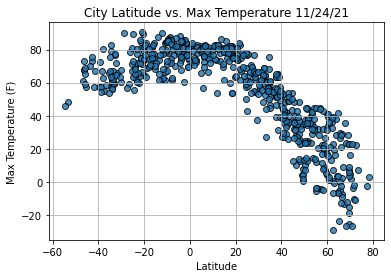

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/ Fig1.png")

# Show plot.
plt.show()

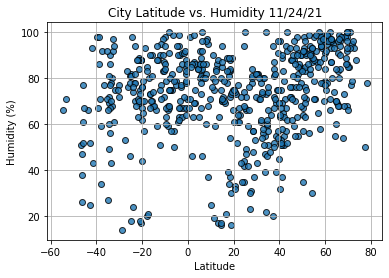

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

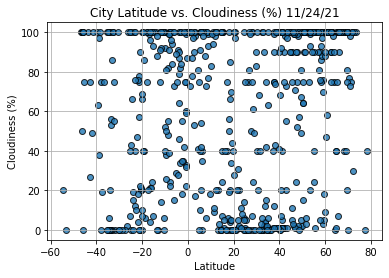

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

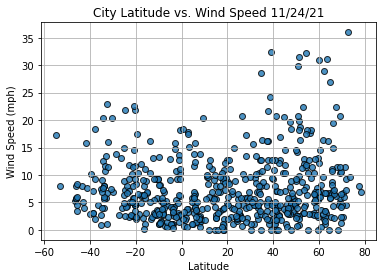

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hambantota,LK,2021-11-25 00:36:40,6.1241,81.1185,75.54,100,40,3.44
2,Albany,US,2021-11-25 00:33:46,42.6001,-73.9662,34.52,71,98,2.75
4,Iqaluit,CA,2021-11-25 00:36:42,63.7506,-68.5145,28.13,74,75,31.07
5,Yumen,CN,2021-11-25 00:36:42,40.2833,97.2000,27.19,32,0,10.98
6,Ribeira Grande,PT,2021-11-25 00:36:42,38.5167,-28.7000,64.98,69,100,24.11


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

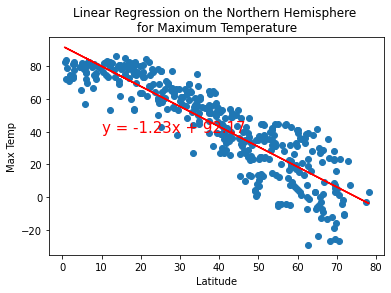

In [35]:
# Linear regression on the Northern Hemisphere MAX TEMP
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(10,40))

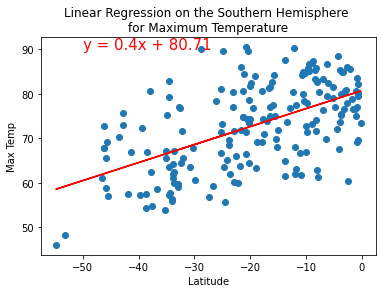

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))

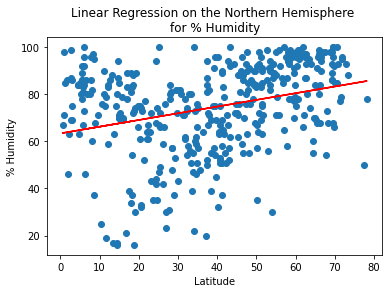

In [37]:
# Linear regression on the Northern Hemisphere HUMIDITY
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

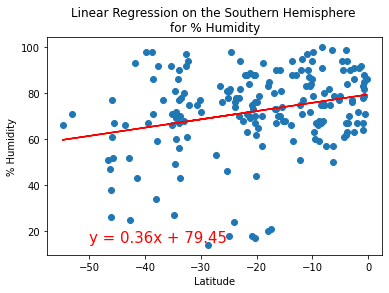

In [34]:
# Linear regression on the Southern Hemisphere HUMIDITY
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,15))

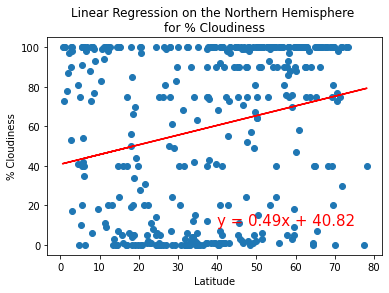

In [38]:
# Linear regression on the Northern Hemisphere CLOUDINESS
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(40,10))

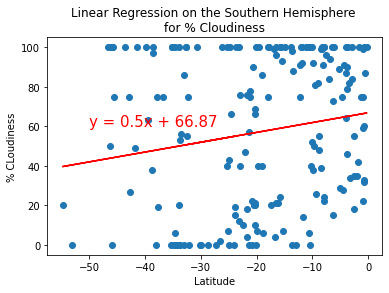

In [39]:
# Linear regression on the Southern Hemisphere CLOUDINESS
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% CLoudiness',(-50,60))

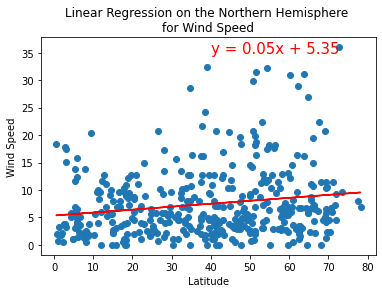

In [43]:
# Linear regression on the Northern Hemisphere WIND SPEED
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,35))

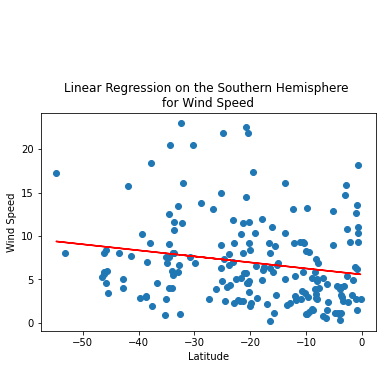

In [45]:
# Linear regression on the Southern Hemisphere WIND SPEED
x_values = southern_hemi_df["Lat"]
y_values =  southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,35))